<a href="https://colab.research.google.com/github/subhash-ranjan/football-dataanalysis-pg/blob/main/EPL_2020_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



**Read the dataset**

In [3]:
epl_df = pd.read_csv('/content/EPL_20_21.csv')
# epd_df.head()

**Check null values**

In [4]:
# epl_df.isna().sum()

**Add 2 new columns**

In [5]:
epl_df['MinsPerMatch']=(epl_df['Mins']/epl_df['Matches']).astype(int)
epl_df['GoalsPerMatch']=(epl_df['Goals']/epl_df['Matches']).astype(float)

In [6]:
# epl_df.head()

**Total goals**

In [7]:
Total_Goals = epl_df['Goals'].sum()

**Penalty goals**

In [8]:
Total_PenaltyGoals = epl_df['Penalty_Goals'].sum()
print(Total_PenaltyGoals)

102


**Penalty attempts**

In [9]:
Total_PenaltyAttempts = epl_df['Penalty_Attempted'].sum()
print(Total_PenaltyAttempts)

125


**Penalties missed vs scored**

In [10]:
plt.figure(figsize=(13,6))
pl_not_scored = Total_PenaltyAttempts - Total_PenaltyGoals
data = [pl_not_scored,Total_PenaltyGoals]
labels = ['Missed','Scored']
color= sns.color_palette('Set2')
# plt.pie(data, labels=labels, colors=color,autopct='%.0f%%')
# plt.show()

<Figure size 936x432 with 0 Axes>

**Unique positions**

In [11]:
epl_df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

**Total forward players**

In [12]:
# epl_df[epl_df['Position']=='FW']


**Most players from which countries**

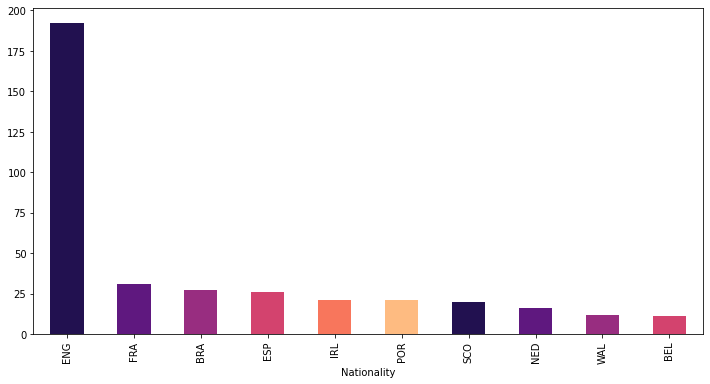

In [13]:
nationality = epl_df.groupby('Nationality').size().sort_values(ascending=False)
nationality.head(10).plot(kind='bar',figsize=(12,6), color= sns.color_palette('magma'))

**Clubs with maximum players in their squad**

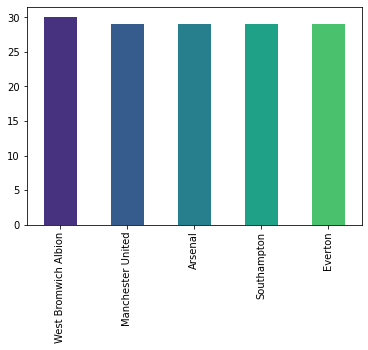

In [14]:
epl_df['Club'].value_counts().nlargest(5).plot(kind='bar',color=sns.color_palette('viridis'))

**Players based on age group**

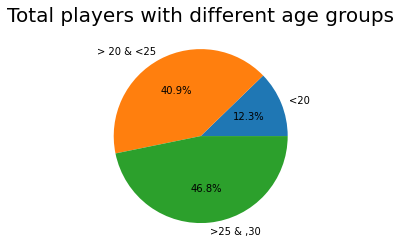

In [15]:
under_20 = epl_df[epl_df['Age']<20]
under_20_25 = epl_df[(epl_df['Age']>20) & (epl_df['Age'] < 25)]
under_25_30 = epl_df[(epl_df['Age']>25) & (epl_df['Age']< 30)]

x = np.array([under_20['Name'].count(), under_20_25['Name'].count(), under_25_30['Name'].count()])
mylabels = ['<20', '> 20 & <25', '>25 & ,30']
plt.title('Total players with different age groups', fontsize= 20)
plt.pie(x, labels= mylabels, autopct="%.1f%%")
plt.show()



**Average age of players in each club plot**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

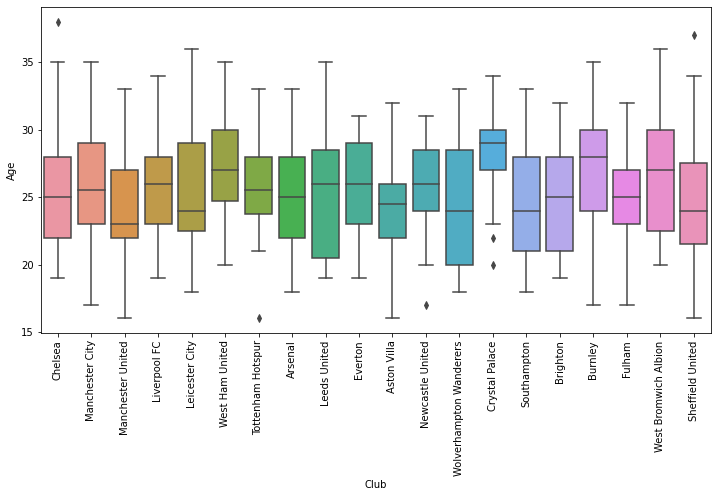

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Club', y='Age', data=epl_df)
plt.xticks(rotation = 90)

**Average age of players in each club**

In [22]:
num_players = epl_df.groupby('Club').size()
data = epl_df.groupby('Club')['Age'].sum()/num_players
data.sort_values(ascending=True)

Club
Manchester United          23.862069
Southampton                24.137931
Aston Villa                24.291667
Wolverhampton Wanderers    24.444444
Brighton                   24.555556
Sheffield United           24.814815
Arsenal                    24.965517
Fulham                     25.035714
Leeds United               25.347826
Everton                    25.413793
Liverpool FC               25.571429
Chelsea                    25.592593
Leicester City             25.592593
Tottenham Hotspur          25.625000
Manchester City            25.708333
Newcastle United           26.074074
West Bromwich Albion       26.766667
Burnley                    27.040000
West Ham United            27.500000
Crystal Palace             28.333333
dtype: float64

**Total assists from each clubs**

Text(0.5, 1.0, 'Plot of Clubs vs Total assists')

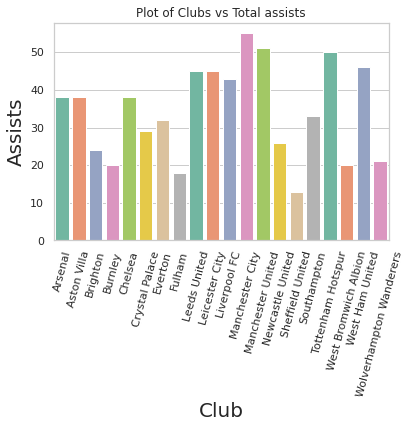

In [33]:
Assists_by_clubs = epl_df.groupby('Club', as_index=False)['Assists'].sum()
sns.set_theme(style='whitegrid', color_codes=True)
ax = sns.barplot(x='Club', y='Assists', data = Assists_by_clubs, palette ='Set2')
ax.set_xlabel('Club', fontsize=20)
ax.set_ylabel('Assists', fontsize=20)
plt.xticks(rotation = 75)
plt.rcParams['figure.figsize']=(20,8)
plt.title('Plot of Clubs vs Total assists')

**Top 10 assists**

In [35]:
Top_10_assists = epl_df[['Name', 'Club', 'Assists', 'Matches']].nlargest(n=10, columns = 'Assists')
Top_10_assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


**Top 10 goals**

In [37]:
top_10_goals = epl_df[['Name','Club','Goals','Matches']].nlargest(n=10, columns='Goals')
top_10_goals

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31
